#1. About the Dataset

This dataset describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service.

It contains 100836 ratings across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.Each user is represented by an id, and no other information is provided.

The data are contained in the files movies.csv, ratings.csv. ([The Dataset](https://drive.google.com/drive/u/0/folders/128I0Z6kkPMWULSbGWmBB4BYf-Yq_Mi88))

[link for Downloading ](https://grouplens.org/datasets/movielens/)


In [55]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV files
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Merge ratings with movies on 'movieId'
df = pd.merge(ratings, movies, on='movieId')

# Check the merged data
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


##1.1 Data Analysis



---



In [57]:
f"You have {len(df.userId.unique())} unique user ids in the data and {len(df.rating.unique())} rating's categories across {len(df.movieId.unique())} movies "


"You have 610 unique user ids in the data and 10 rating's categories across 9724 movies "

#### Movies with Most Ratings

In [58]:
rating_by_title=df.groupby('title').size().sort_values(ascending=False)
rating_by_title

,0
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
King Solomon's Mines (1950),1
King Solomon's Mines (1937),1
King Ralph (1991),1


In [59]:
active_movies= rating_by_title.index[rating_by_title>=200]
movies =[]
for movie in active_movies[:20]:
  movies.append(movie)
#convert list todataframe
movies=pd.DataFrame(movies,columns=['title'])
movies

,title
0,Forrest Gump (1994)
1,"Shawshank Redemption, The (1994)"
2,Pulp Fiction (1994)
3,"Silence of the Lambs, The (1991)"
4,"Matrix, The (1999)"
5,Star Wars: Episode IV - A New Hope (1977)
6,Jurassic Park (1993)
7,Braveheart (1995)
8,Terminator 2: Judgment Day (1991)
9,Schindler's List (1993)




---



#### Date And Time Analysis

In [60]:
#genre column
df_copy = df.copy()
df_copy['genres_split'] = df['genres'].str.split('|')
df_copy = df_copy.explode('genres_split')
df_copy.drop(columns=['genres'], inplace=True)
df_copy.head()

,userId,movieId,rating,timestamp,title,genres_split
0,1,1,4.0,964982703,Toy Story (1995),Adventure
0,1,1,4.0,964982703,Toy Story (1995),Animation
0,1,1,4.0,964982703,Toy Story (1995),Children
0,1,1,4.0,964982703,Toy Story (1995),Comedy
0,1,1,4.0,964982703,Toy Story (1995),Fantasy


In [61]:
df_copy["timestamp"] = pd.to_datetime(df_copy["timestamp"], unit='s')
df_copy

,userId,movieId,rating,timestamp,title,genres_split
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Animation
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Children
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Comedy
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Fantasy
...,...,...,...,...,...,...
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Sci-Fi
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Action
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Crime
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Drama


In [62]:
df_copy["production_year"] = df_copy["title"].str[-5:-1]
df_copy

,userId,movieId,rating,timestamp,title,genres_split,production_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Animation,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Children,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Comedy,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Fantasy,1995
...,...,...,...,...,...,...,...
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Sci-Fi,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Action,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Crime,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Drama,2017


In [63]:
df_copy["production_year"].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', 'irro', '1934',
       '995)', '1916', '1908', '1932', '1921', '1925', '1929', '1917',
       'atso', ' Bab', 'ron ', '1915', '1924', '1903', 'r On', 'lon ',
      

In [64]:
df_copy["production_year"].unique().size

127

In [65]:
# Filter DataFrame to only keep rows where production_year is numeric
df_copy = df_copy[df_copy["production_year"].str.isnumeric()]
df_copy

,userId,movieId,rating,timestamp,title,genres_split,production_year
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Animation,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Children,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Comedy,1995
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Fantasy,1995
...,...,...,...,...,...,...,...
100834,610,168252,5.0,2017-05-03 21:19:12,Logan (2017),Sci-Fi,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Action,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Crime,2017
100835,610,170875,3.0,2017-05-03 21:20:15,The Fate of the Furious (2017),Drama,2017


In [66]:
df_copy["production_year"].unique()

array(['1995', '1996', '1994', '1977', '1993', '1990', '1989', '1991',
       '1940', '1939', '1941', '1938', '1947', '1975', '1968', '1945',
       '1963', '1971', '1951', '1979', '1992', '1986', '1982', '1980',
       '1987', '1981', '1983', '1960', '1952', '1984', '1933', '1985',
       '1974', '1922', '1997', '1998', '1930', '1976', '1942', '1967',
       '1959', '1946', '1978', '1973', '1988', '1999', '1931', '1964',
       '1962', '1965', '1969', '2000', '1970', '2003', '2004', '2006',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '1955', '2002', '1961', '1954', '1957', '1943', '1956', '1966',
       '2001', '1937', '1972', '2005', '1950', '2007', '2016', '1926',
       '1944', '1949', '1936', '2017', '1958', '1935', '1927', '1953',
       '2018', '1923', '1902', '1920', '1948', '1928', '1934', '1916',
       '1908', '1932', '1921', '1925', '1929', '1917', '1915', '1924',
       '1903', '1919'], dtype=object)

In [67]:
df_copy["production_year"].unique().size

106

In [68]:
condition = df_copy["production_year"].astype(int) < 2019
prodcount = (df_copy[condition][["production_year", "movieId"]].groupby("production_year").count())
prodcount

,movieId
production_year,
1902,20
1903,4
1908,3
1915,2
1916,10
...,...
2014,3367
2015,3003
2016,1979


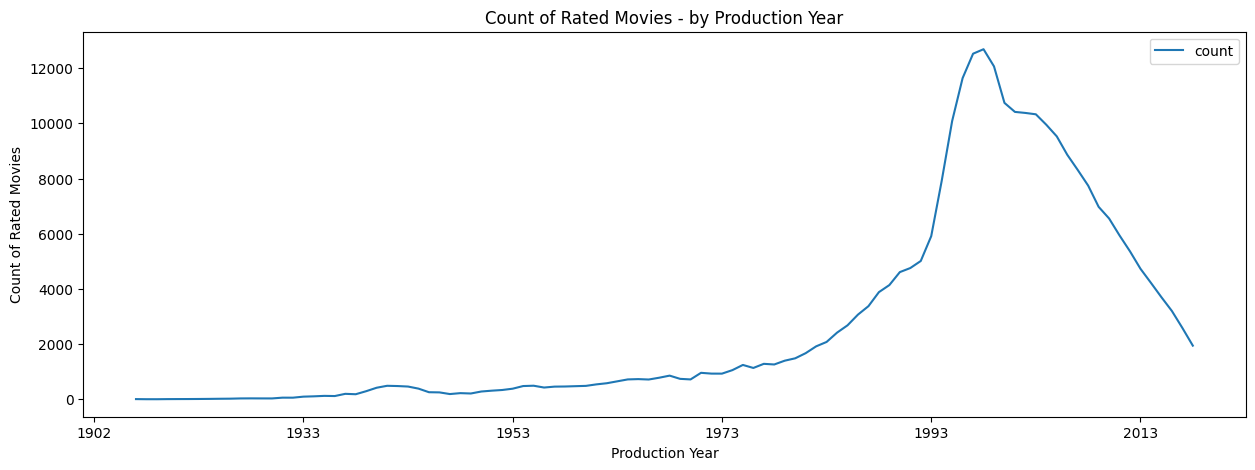

In [69]:
#5-year rolling average of count of rated movies by their respective years
(prodcount.rolling(5).mean().rename(columns={"movieId": "count"}).plot(figsize=(15, 5)))
plt.xlabel("Production Year")
plt.ylabel("Count of Rated Movies")
plt.title("Count of Rated Movies - by Production Year")
plt.show()

- These are the rated movies.
- The Peak ratings were in the 90s.
- People didn’t have time to watch the most recent movies. If they didn’t watch them, they don’t rate them, and you can see a decline in ratings.



---



####Genre with Most Ratings

In [70]:
#sort in ascending order the genre with most ratings
rating_by_genre=df_copy.groupby('genres_split').size().sort_values(ascending=False)
rating_by_genre.head()

,0
genres_split,
Drama,41923
Comedy,39049
Action,30623
Thriller,26446
Adventure,24157


In [71]:
!pip install highlight_text

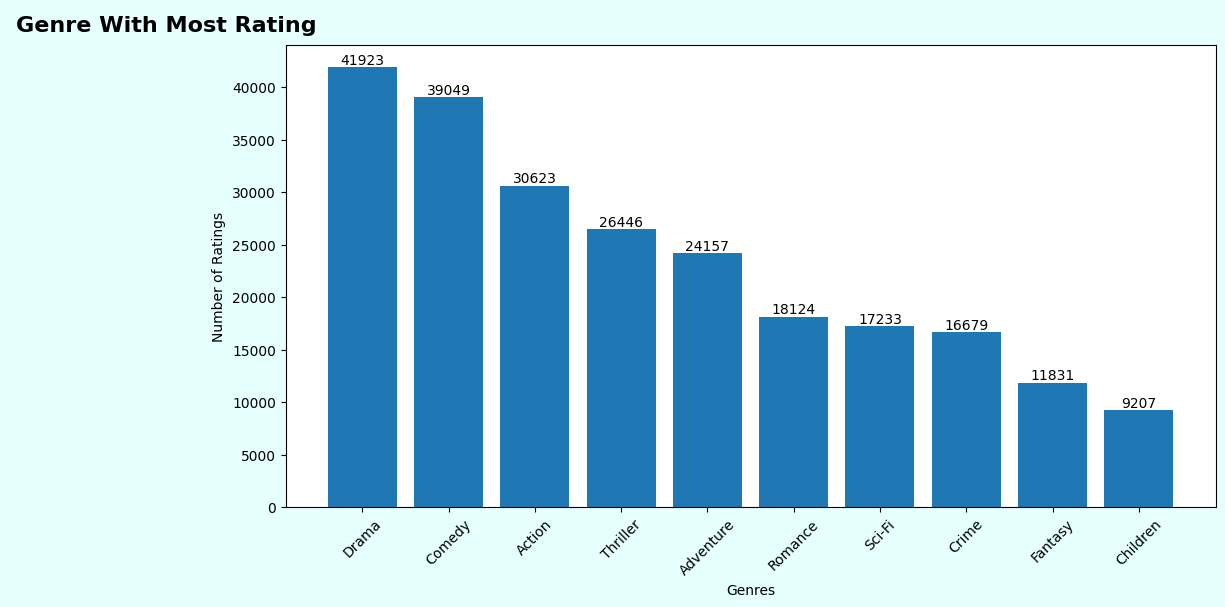

In [72]:
from highlight_text import fig_text
#draw a plot for ratings by genre
plt.figure(facecolor = "#e6ffff",figsize=(12, 6))
plt.bar(rating_by_genre.index[:10], rating_by_genre[:10])
#Heading
fig_text(
        x=-0.1,y=0.93,
        s="Genre With Most Rating",
        size=16,
        color="black",
        weight="bold",
        annotationbbox_kw={"xycoords": "figure fraction"})

for i, v in enumerate(rating_by_genre[:10]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Genres')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [73]:
# top 6 genres by the total number of movies
top6_genre = (rating_by_genre.head(6).index.values)
top6_genre

array(['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Romance'],
      dtype=object)

In [74]:
df_copy[['genres_split','production_year']].groupby("production_year").sum()

,genres_split
production_year,
1902,ActionAdventureFantasySci-FiActionAdventureFan...
1903,CrimeWesternCrimeWestern
1908,AnimationComedySci-Fi
1915,DramaWar
1916,ComedyActionAdventureSci-FiDramaFantasyRomance...
...,...
2014,Sci-FiIMAXDramaCrimeDramaThrillerComedyDramaSc...
2015,DramaSci-FiThrillerActionAdventureSci-FiThrill...
2016,ActionAdventureComedySci-FiActionAdventureSci-...


problem -> can't identify the genre due each production year has all genre as a string not individual.

In [75]:
# Create a unique identifier for each genre within a movie
df_copy['genre_id'] = df_copy.groupby('movieId').cumcount()
# Pivot the DataFrame
pivoted_df = df_copy.pivot_table(index='movieId', columns='genres_split', aggfunc='size', fill_value=0)
# Reset the index to make it a regular column
pivoted_df = pivoted_df.reset_index()
pivoted_df

<ipython-input-75-bff52f032fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['genre_id'] = df_copy.groupby('movieId').cumcount()


genres_split,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,2,0,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,4,0,0,0,0,0,7,0,0,7,0,0,0,0,0,0,7,0,0,0,0
4,5,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9696,193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9697,193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9698,193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9699,193587,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
#testing
#movieID 5 has an occurrence of 49 ratings from diffrent userID
movie_5= df_copy[df_copy['movieId'] == 5]
movie_5

,userId,movieId,rating,timestamp,title,genres_split,production_year,genre_id
563,6,5,5.0,1996-10-17 12:05:38,Father of the Bride Part II (1995),Comedy,1995,0
4880,31,5,3.0,1996-12-13 08:44:02,Father of the Bride Part II (1995),Comedy,1995,1
6317,43,5,5.0,1996-11-26 07:44:41,Father of the Bride Part II (1995),Comedy,1995,2
6478,45,5,3.0,2000-05-29 18:31:42,Father of the Bride Part II (1995),Comedy,1995,3
8512,58,5,4.0,1996-11-11 13:32:31,Father of the Bride Part II (1995),Comedy,1995,4
9980,66,5,4.0,2005-04-11 03:32:47,Father of the Bride Part II (1995),Comedy,1995,5
10363,68,5,2.0,2006-09-17 22:53:44,Father of the Bride Part II (1995),Comedy,1995,6
13076,84,5,3.0,1997-03-06 13:01:29,Father of the Bride Part II (1995),Comedy,1995,7
15567,103,5,4.0,2015-05-18 13:59:58,Father of the Bride Part II (1995),Comedy,1995,8
16972,107,5,4.0,1996-04-12 15:19:00,Father of the Bride Part II (1995),Comedy,1995,9


In [77]:
# Group by movieId to get a DataFrame with movieId and production_year
production_year_df = df_copy.groupby('movieId', as_index=False)['production_year'].first()

# Merge the pivoted DataFrame with the production_year DataFrame
merged_df = pd.merge(pivoted_df, production_year_df, on='movieId')
merged_df

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,production_year
0,1,0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0,1995
1,2,0,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0,1995
3,4,0,0,0,0,0,7,0,0,7,0,0,0,0,0,0,7,0,0,0,0,1995
4,5,0,0,0,0,0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9696,193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2017
9697,193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2017
9698,193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2017
9699,193587,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018


In [78]:
production_year_df['production_year'].dtype

dtype('O')

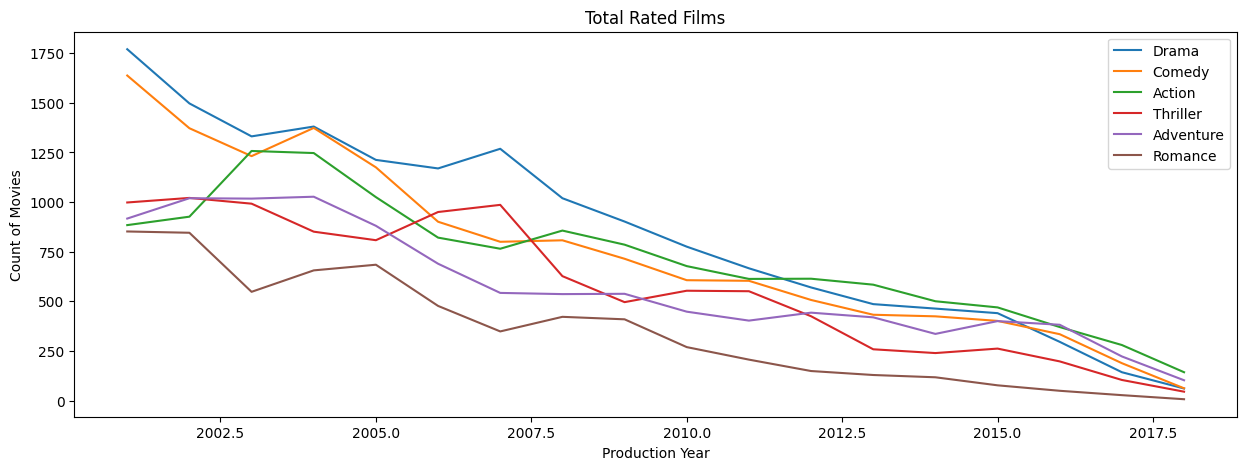

In [79]:
#convert object type to numeric
merged_df['production_year'] = pd.to_numeric(merged_df['production_year'], errors='coerce')
filtered_df = merged_df[(merged_df['production_year'] >= 2000) & (merged_df['production_year'] <= 2019)]

# Group by production_year and sum the ratings for the top genres
genre_groups = (filtered_df[top6_genre.tolist() + ['production_year']]
                .groupby('production_year')
                .sum())

# Use only the years from 2000 to 2019
genre_groups = genre_groups.loc[2000:2019]

# Plot the rolling mean of the genre groups
genre_groups.rolling(window=2).mean().plot(figsize=(15, 5))
plt.xlabel("Production Year")
plt.ylabel("Count of Movies")
plt.title("Total Rated Films")
plt.show()


We observe a significant increase in the popularity of action and adventure films in recent years, while the drama genre has experienced a decline during the same period.

## 1.2 Modify the data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [81]:
df.shape

(100836, 6)

In [82]:
def column_info(df):
  cols=[]
  dtypes=[]
  unique_v=[]
  n_unique_v=[]

  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype.name)
    unique_v.append(df[col].unique())
    n_unique_v.append(df[col].nunique())

  return pd.DataFrame({'names':cols,'types':dtypes,'unique':unique_v,'n_unique':n_unique_v})


In [83]:
column_info(df)

,names,types,unique,n_unique
0,userId,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",610
1,movieId,int64,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,...",9724
2,rating,float64,"[4.0, 5.0, 3.0, 2.0, 1.0, 4.5, 3.5, 2.5, 0.5, ...",10
3,timestamp,int64,"[964982703, 964981247, 964982224, 964983815, 9...",85043
4,title,object,"[Toy Story (1995), Grumpier Old Men (1995), He...",9719
5,genres,object,"[Adventure|Animation|Children|Comedy|Fantasy, ...",951


Here we notice that number of movieIDs does not equal the number of titles maybe some duplicated or something we are going to solve it by making a new index id for the every unique title

In [84]:
# Create a new index for each unique title
df['movie_id'] = df.groupby('title').ngroup()
df.head()

,userId,movieId,rating,timestamp,title,genres,movie_id
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8871
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,3661
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,3845
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,7523
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,9119


In [85]:
df.nunique()

,0
userId,610
movieId,9724
rating,10
timestamp,85043
title,9719
genres,951
movie_id,9719


In [86]:
df = df.drop(columns=[ 'movieId'])
df.head()

,userId,rating,timestamp,title,genres,movie_id
0,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8871
1,1,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,3661
2,1,4.0,964982224,Heat (1995),Action|Crime|Thriller,3845
3,1,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,7523
4,1,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,9119


In [87]:
#check nulls
df.isnull().sum()

,0
userId,0
rating,0
timestamp,0
title,0
genres,0
movie_id,0


In [88]:
#check duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows

,userId,rating,timestamp,title,genres,movie_id


In [89]:
df

,userId,rating,timestamp,title,genres,movie_id
0,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8871
1,1,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,3661
2,1,4.0,964982224,Heat (1995),Action|Crime|Thriller,3845
3,1,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,7523
4,1,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,9119
...,...,...,...,...,...,...
100831,610,4.0,1493848402,Split (2017),Drama|Horror|Thriller,7938
100832,610,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,4597
100833,610,5.0,1494273047,Get Out (2017),Horror,3392
100834,610,5.0,1493846352,Logan (2017),Action|Sci-Fi,5161


### Drop Columns
We are going to remove the timestamp because we will not need it in the content or collbrative filltering

In [90]:
# Dropping 'timestamp' column
df = df.drop(columns=[ 'timestamp'])
df.head()

,userId,rating,title,genres,movie_id
0,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8871
1,1,4.0,Grumpier Old Men (1995),Comedy|Romance,3661
2,1,4.0,Heat (1995),Action|Crime|Thriller,3845
3,1,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,7523
4,1,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,9119


In [91]:
df["rating"].value_counts()

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [92]:
df["genres"].value_counts()

,count
genres,
Comedy,7196
Drama,6291
Comedy|Romance,3967
Comedy|Drama|Romance,3000
Comedy|Drama,2851
...,...
Action|Adventure|Animation|Comedy|Fantasy|Mystery|Sci-Fi,1
Children|Fantasy|Musical|Romance,1
Comedy|Crime|Drama|Horror,1


In [93]:
df.shape

(100836, 5)

###Genre Column
*   split the geners by the |
*   apply the MultiLabelBinarizer encoding



In [94]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split the genres by '|'
df['genres_split'] = df['genres'].str.split('|')

# Step 2: Apply MultiLabelBinarizer to encode genres as multiple binary columns
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres_split']), columns=mlb.classes_, index=df.index)

# Step 3: Concatenate the encoded genres back to the original DataFrame
df = pd.concat([df, genres_encoded], axis=1)
# Drop the unnecessary 'genres_split' and 'genres' columns
df.drop(['genres', 'genres_split'], axis=1, inplace=True)
df


,userId,rating,title,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,4.0,Toy Story (1995),8871,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,4.0,Grumpier Old Men (1995),3661,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,4.0,Heat (1995),3845,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,5.0,Seven (a.k.a. Se7en) (1995),7523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,5.0,"Usual Suspects, The (1995)",9119,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,4.0,Split (2017),7938,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
100832,610,5.0,John Wick: Chapter Two (2017),4597,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100833,610,5.0,Get Out (2017),3392,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
100834,610,5.0,Logan (2017),5161,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [95]:
df.shape

(100836, 24)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   rating              100836 non-null  float64
 2   title               100836 non-null  object 
 3   movie_id            100836 non-null  int64  
 4   (no genres listed)  100836 non-null  int64  
 5   Action              100836 non-null  int64  
 6   Adventure           100836 non-null  int64  
 7   Animation           100836 non-null  int64  
 8   Children            100836 non-null  int64  
 9   Comedy              100836 non-null  int64  
 10  Crime               100836 non-null  int64  
 11  Documentary         100836 non-null  int64  
 12  Drama               100836 non-null  int64  
 13  Fantasy             100836 non-null  int64  
 14  Film-Noir           100836 non-null  int64  
 15  Horror              100836 non-nul

###Rating Column


*   Check the outliers
*   Scale the data becaue it is better be continuous to the collbrative filtering system.




<Axes: ylabel='rating'>

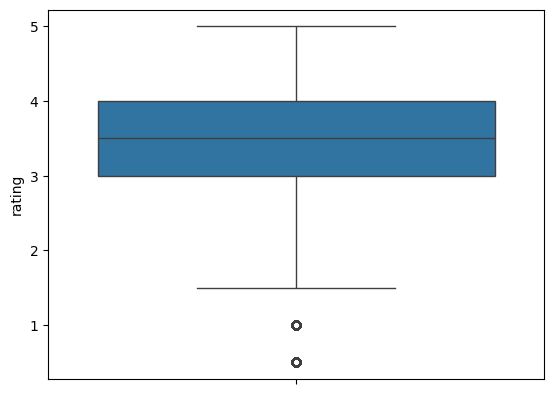

In [97]:
sns.boxplot(df["rating"])

In [98]:
print ("outliers :" , df[(df['rating'] <1.5)].count())

outliers : userId                4181
rating                4181
title                 4181
movie_id              4181
(no genres listed)    4181
Action                4181
Adventure             4181
Animation             4181
Children              4181
Comedy                4181
Crime                 4181
Documentary           4181
Drama                 4181
Fantasy               4181
Film-Noir             4181
Horror                4181
IMAX                  4181
Musical               4181
Mystery               4181
Romance               4181
Sci-Fi                4181
Thriller              4181
War                   4181
Western               4181
dtype: int64


outliers are important to the credibility of ratings

In [99]:
# from sklearn.preprocessing import MinMaxScaler

# # Example of normalizing the rating column
# scaler = MinMaxScaler()
# df['rating_normalized'] = scaler.fit_transform(df[['rating']])
# df.head()

In [100]:
# df.describe()

###Title Column

We use the TF-IDF(how many times frequency of a word but idf will look for importance of the words in the context. in vector space we look for similarity with cosine similarity.
) because it's more simpler than word embedding and also we do not have a huge sequence so using will make more complex later for the model.




In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
df['title_tfidf'] = list(tfidf.fit_transform(df['title']).toarray())
#display all columns
pd.set_option('display.max_columns', None)
df.head()

,userId,rating,title,movie_id,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title_tfidf
0,1,4.0,Toy Story (1995),8871,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,4.0,Grumpier Old Men (1995),3661,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,4.0,Heat (1995),3845,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,5.0,Seven (a.k.a. Se7en) (1995),7523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,5.0,"Usual Suspects, The (1995)",9119,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [102]:
df.shape

(100836, 25)

#2. Filtering


## 2.1 Collaborative Filtering
This technique is based on the premise that similar people like similar things.

In [53]:
# !pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=9f629205e826c6183fcc0f53683cd3f4b76c14698b85b5c91e7d3fab18a321d5
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [104]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

df.columns

Index(['userId', 'rating', 'title', 'movie_id', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'title_tfidf'],
      dtype='object')

###Before Normalization

In [105]:
reader = Reader(rating_scale=(0.5, 5.0))
ratings_data = Dataset.load_from_df(df[['userId', 'movie_id', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(ratings_data, test_size=0.25)

In [ ]:
from surprise import KNNBasic

# Use KNNBasic for Collaborative Filtering
sim_options = {
    'name': 'cosine',  # similarity metric (could also use 'pearson' or 'msd')
    'user_based': False  # False means item-based filtering; True would mean user-based filtering
}
knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)
# Make predictions on the testset
predictions_knn = knn.test(testset)
# Evaluate RMSE (Root Mean Squared Error)
rmse_knn = accuracy.rmse(predictions_knn)

# Evaluate MAE (Mean Absolute Error)
mae_knn = accuracy.mae(predictions_knn)


In [110]:
from surprise import SVD
svd = SVD()  # Singular Value Decomposition algorithm for collaborative filtering
svd.fit(trainset)
# Make predictions on the testset
predictions_svd = svd.test(testset)
# Evaluate RMSE (Root Mean Squared Error)
rmse_svd = accuracy.rmse(predictions_svd)
# Evaluate MAE (Mean Absolute Error)
mae_svd = accuracy.mae(predictions_svd)

In [113]:
from surprise import KNNWithZScore
sim_options = {
    'name': 'cosine',  # Similarity metric (could also use 'pearson' or 'msd')
    'user_based': False  # Use item-based collaborative filtering
}

knn_zscore = KNNWithZScore(sim_options=sim_options)
knn_zscore.fit(trainset)
# Make predictions
predictions_knnz = knn_zscore.test(testset)

# Evaluate RMSE and MAE
rmse_knnz = accuracy.rmse(predictions_knnz)
mae_knnz = accuracy.mae(predictions_knnz)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [115]:
from surprise import KNNWithMeans #use KNNWithMeans instead of KNNWithPearson

sim_options = {
    'name': 'pearson',  # Similarity metric (using 'pearson' here)
    'user_based': False  # Use item-based collaborative filtering
}

knn_pearson = KNNWithMeans(sim_options=sim_options) #KNNWithMeans is used instead of KNNWithPearson
knn_pearson.fit(trainset)
# Make predictions
predictions_knnp = knn_pearson.test(testset)  # Use the knn_pearson instance

# Evaluate RMSE and MAE
rmse_knnp = accuracy.rmse(predictions_knnp)
mae_knnp = accuracy.mae(predictions_knnp)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
from surprise import SVDpp
svdpp = SVDpp()
svdpp.fit(trainset)
# Make predictions
predictions_svdpp = svdpp.test(testset)

# Evaluate RMSE and MAE
rmse_svdpp = accuracy.rmse(predictions_svdpp)
mae_svdpp = accuracy.mae(predictions_svdpp)


In [ ]:
from surprise import NMF
nmf = NMF()
nmf.fit(trainset)
# Make predictions
predictions_nmf = nmf.test(testset)

# Evaluate RMSE and MAE
rmse_nmf = accuracy.rmse(predictions_nmf)
mae_nmf = accuracy.mae(predictions_nmf)


###After Normalization

In [ ]:
reader = Reader(rating_scale=(0, 1.0))
ratings_data = Dataset.load_from_df(df[['userId', 'movie_id', 'rating_normalized']], reader)

# Train-test split
trainset, testset = train_test_split(ratings_data, test_size=0.25)

####KNN Basic

In [ ]:
from surprise import KNNBasic

# Use KNNBasic for Collaborative Filtering
sim_options = {
    'name': 'msd',  # similarity metric (could also use 'pearson' or 'msd')
    'user_based': False  # False means item-based filtering; True would mean user-based filtering
}

knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)
# Make predictions on the testset
predictions_knn = knn.test(testset)
# Evaluate RMSE (Root Mean Squared Error)
rmse_knn = accuracy.rmse(predictions_knn)

# Evaluate MAE (Mean Absolute Error)
mae_knn = accuracy.mae(predictions_knn)

####SVD

In [ ]:
from surprise import SVD
svd = SVD()  # Singular Value Decomposition algorithm for collaborative filtering
svd.fit(trainset)
# Make predictions on the testset
predictions_svd = svd.test(testset)
# Evaluate RMSE (Root Mean Squared Error)
rmse_svd = accuracy.rmse(predictions_svd)

# Evaluate MAE (Mean Absolute Error)
mae_svd = accuracy.mae(predictions_svd)

####KNN With Z-score

In [ ]:
from surprise import KNNWithZScore
sim_options = {
    'name': 'msd',  # Similarity metric (could also use 'pearson' or 'msd')
    'user_based': False  # Use item-based collaborative filtering
}

knn_zscore = KNNWithZScore(sim_options=sim_options)
knn_zscore.fit(trainset)
# Make predictions
predictions_knnz = knn_zscore.test(testset)

# Evaluate RMSE and MAE
rmse_knnz = accuracy.rmse(predictions_knnz)
mae_knnz = accuracy.mae(predictions_knnz)

####KNN With Means

In [ ]:
from surprise import KNNWithMeans #use KNNWithMeans instead of KNNWithPearson

sim_options = {
    'name': 'pearson',  # Similarity metric (using 'pearson' here)
    'user_based': False  # Use item-based collaborative filtering
}

knn_pearson = KNNWithMeans(sim_options=sim_options) #KNNWithMeans is used instead of KNNWithPearson
knn_pearson.fit(trainset)
# Make predictions
predictions_knnp = knn_pearson.test(testset)  # Use the knn_pearson instance

# Evaluate RMSE and MAE
rmse_knnp = accuracy.rmse(predictions_knnp)
mae_knnp = accuracy.mae(predictions_knnp)

####SVDpp

In [ ]:
from surprise import SVDpp
svdpp = SVDpp()
svdpp.fit(trainset)
# Make predictions
predictions_svdpp = svdpp.test(testset)

# Evaluate RMSE and MAE
rmse_svdpp = accuracy.rmse(predictions_svdpp)
mae_svdpp = accuracy.mae(predictions_svdpp)


####NMF

In [ ]:
from surprise import NMF
nmf = NMF()
nmf.fit(trainset)
# Make predictions
predictions_nmf = nmf.test(testset)

# Evaluate RMSE and MAE
rmse_nmf = accuracy.rmse(predictions_nmf)
mae_nmf = accuracy.mae(predictions_nmf)


###Evaluating Different Models

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['KNNBasic', 'SVD', 'KNNWithZScore', 'KNNWithMeans', 'SVDpp', 'NMF']

# MAE scores for each model
mae_scores = [mae_knn, mae_svd, mae_knnz, mae_knnp, mae_svdpp, mae_nmf]

# Create bar plot
plt.figure(figsize=(10, 4))
bars = plt.bar(models, mae_scores, color=['blue', 'green', 'red', 'cyan', 'purple', 'yellow'])

# Add numbers (MAE scores) on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('MAE Score')
plt.title('MAE Scores for Different Models')

# Display the plot
plt.show()


**we are going to use the better model is svdpp**

### Collaborative Filtering Recommender

In [ ]:
rating = df[['userId', 'movie_id', 'rating_normalized']]
movies = df[['movie_id', 'title']]

In [ ]:
def get_svdpp_recommendations(user_id, model, rating_df, movies_df, top_n=10):
    """
    Recommends top N movies for a specific user using the SVDpp model.

    :param user_id: ID of the user
    :param model: Trained SVDpp model
    :param rating_df: DataFrame containing userId, movieId, and rating
    :param movies_df: DataFrame containing movieId and title
    :param top_n: Number of movies to recommend (default: 10)
    :return: List of top N recommended movie titles
    """
    # Get all movie ids from the movies DataFrame
    all_movie_ids = movies_df['movie_id'].unique()  # Ensure 'movieId' is correct

    # Get the list of movies that the user has already rated
    watched_movie_ids = rating_df[rating_df['userId'] == user_id]['movie_id'].unique()

    # Find movies the user hasn't watched yet
    not_watched_ids = [mid for mid in all_movie_ids if mid not in watched_movie_ids]

    # Predict ratings for all unwatched movies
    predicted_ratings = [model.predict(user_id, mid) for mid in not_watched_ids]

    # Sort movies by predicted rating in descending order
    predicted_ratings.sort(key=lambda x: x.est, reverse=True)

    # Get the top N movie ids
    top_movie_ids = [pred.iid for pred in predicted_ratings[:top_n]]

    # Return the movie titles for the top N recommendations
    recommended_titles = movies_df[movies_df['movie_id'].isin(top_movie_ids)]['title'].tolist()


    return list(set(recommended_titles))


In [ ]:
# Assuming 'rating_df' contains user ratings and 'movies_df' contains movie details
recommendations = get_svdpp_recommendations(user_id=4, model=svdpp, rating_df=rating, movies_df=df)

print("SVDpp Recommendations for User 1:", recommendations)


##2.2 Content Based Filtering
Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the cold start problem. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

In [ ]:
df.head()

#3. Azure Integration

##3.1 Generate synthetic user profiles using a GAN


##prepare data for GAN

###convert title to numeric

In [ ]:
non_numerical_columns = df.select_dtypes(exclude=['number']).columns
print(non_numerical_columns)

In [ ]:
from gensim.models import Word2Vec

# Tokenize titles
df['tokenized_title'] = df['title'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_title'], vector_size=100, window=5, min_count=1, workers=4)

# Get vector representation for each title
def get_title_vector(title, model):
    words = title.split()
    return np.mean([model.wv[word] for word in words if word in model.wv], axis=0)

df['title_vector'] = df['title'].apply(lambda x: get_title_vector(x, word2vec_model))

# Drop original 'title' column and replace with 'title_vector' for GAN input
numerical = df.drop(['title','tokenized_title','title_tfidf'], axis=1)
processed_data = pd.concat([df['title_vector'], numerical], axis=1)

In [ ]:
processed_data.info()

In [ ]:
import pandas as pd
import numpy as np


title_vectors = pd.DataFrame(df['title_vector'].tolist())  # Convert the title vectors into a DataFrame
title_vectors.columns = [f'title_vector_{i}' for i in range(title_vectors.shape[1])]  # Rename columns

# Now, concatenate this with data
numerical = df.drop(['title', 'title_vector'], axis=1)  # Drop original title and title_vector
processed_data = pd.concat([title_vectors, numerical], axis=1)  # Combine them

# Verify the result
print(processed_data.dtypes)  # Check the data types to ensure they are numeric
print(processed_data.head())  # Inspect the first few rows of the processed data


In [ ]:
processed_data.info()

In [ ]:
processed_data=processed_data.drop(['title_tfidf', 'tokenized_title'], axis=1)

### Train the GAN to learn the underlying patterns and generate new, realistic profiles.

In [ ]:
processed_data.shape

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# Hyperparameters
latent_dim = 35   #it good to be between 1/4 , 1/10 of num of feature
num_features = 124
batch_size = 124    #num of samples for eath iteration
epochs = 110


# Load your existing movie recommendation data
movie_data = processed_data
num_samples = movie_data.shape[0]

# Ensure all data is numeric and of type float32
movie_data = movie_data.select_dtypes(include=np.number).astype(np.float64)

# If there are any missing values, you can fill them with 0 or the mean:
#movie_data = movie_data.fillna(0)  # Fill with 0
#movie_data = movie_data.fillna(movie_data.median())  # Fill with mean
#movie_data=movie_data.dropna(inplace=True)

# Normalize the movie data to [0, 1]
movie_data = (movie_data - movie_data.min()) / (movie_data.max() - movie_data.min())


# Define the input layer for the GAN
gan_input = Input(shape=(latent_dim,))

# Build the discriminator
discriminator = Sequential([
    Dense(1024, input_shape=(num_features,), activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Build the generator
generator = Sequential([
    Dense(1024, input_dim=latent_dim, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_features, activation='sigmoid')
])

# Create the GAN
gan = Model(inputs=gan_input, outputs=discriminator(generator(gan_input)))

# Compile the discriminator and GAN
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5), metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5))

# Train the GAN
for epoch in range(epochs):
    # Train the discriminator
    real_labels = np.ones((batch_size, 1), dtype=np.float32)
    fake_labels = np.zeros((batch_size, 1), dtype=np.float32)

    idx = np.random.randint(0, movie_data.shape[0], batch_size)
    real_images = movie_data.iloc[idx].values  # Convert to numpy array after normalization
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)

    # Print shapes for debugging (optional)
    # print("Shape of real_images:", real_images.shape)
    # print("Shape of fake_images:", fake_images.shape)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_labels)



    # Print loss values
    print(f"Epoch: {epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")
    # Generate new synthetic movie recommendation profiles
noise = np.random.normal(0, 1, (128, latent_dim))
synthetic_profiles = generator.predict(noise)


##3.2 Azure model

In [ ]:
from azureml.core import Workspace, Experiment, Dataset, Pipeline
from azureml.pipeline.steps import PythonScriptStep

# Create a workspace
ws = Workspace.from_config()

# Create a pipeline
pipeline = Pipeline(steps=[
    PythonScriptStep(
        name="train_model",
        script_name="train_model.py",
        arguments=["--input_data", "combined_data.csv"],
        compute_target="your_compute_target"
    ),
    PythonScriptStep(
        name="deploy_model",
        script_name="deploy_model.py",
        arguments=["--model_file", "your_model.pkl"],
        compute_target="your_compute_target"
    )
])

# Submit the pipeline to Azure ML
experiment = Experiment(ws, "movie_recommendation_pipeline")
run = experiment.submit(pipeline)

#4. MLOps & Chatbot